# Binary Trees
- is either empty, or
- a root node r together with a left binary tree and a right binary tree.

In [1]:
class BinaryTreeNode:
    def __init__(self, data=None, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
    def __repr__(self):
        return f"BinaryTreeNode(data:{self.data})"

### Search Path
For every node, there exists a unique path from root to that node with each node in the sequence being a child of previous node. This sequence is known as Search Path from root to that node.

### Ancestor-Descendant
We say a node is a ancestor of a node d, if it lies in the search path of d and d will be it's descendant.

A node is a ancestor and descendant of itself.

### Depth
depth of a node n is the number of nodes on the search path from root to n, not including n itself.
### Height
height of a binary tree is the maximum depth of any node in the tree.
### Level
all nodes at same depth are called to be at same level.

### Full Binary Tree
binary tree in which every node other than the leaves has two children.<br>
min-nodes: $2^{h} + 1$, for height $h$. <br>
max-nodes: $2^{h+1} - 1$, for height $h$. <br>
height: $\big\lfloor \lg(n) \big\rfloor$ ,for $n$ nodes.

### Perfect Binary Tree
full binary tree in which all leaves are at same depth.<br>
min-height = max-height = $\lg(n+1) - 1$, for $n$ nodes.<br>
number of nodes = $2^{h+1} - 1$ for $h$ height

### Complete Binary Tree
binary tree in which every level, except possibly the last, is completely filled.<br>
min-nodes: $2^{h}$, for height $h$ <br>
max-nodes: $2^{h+1} - 1$ for height $h$ <br>
height: $\big\lfloor \lg(n) \big\rfloor$ ,for $n$ nodes.

### Skewed Binary Tree
**Left-skewed:** A tree in which no node has a right child.<br>
**Right-skewed:** A tree in which no node has a left child.

## Traversal
**Preorder:** root -> left -> right <br>
**Postorder:** left -> right -> root <br>
**Inorder:** left -> root -> right

In [2]:
c = BinaryTreeNode(4)
d = BinaryTreeNode(5)
e = BinaryTreeNode(6)

a = BinaryTreeNode(2, c ,d)
b = BinaryTreeNode(3, e)
root = BinaryTreeNode(1, a, b)

In [3]:
import iplantuml

Writing output for /home/shaker/Documents/Github/AlgoRhythms/EPI/e9724a06-677a-4a9b-84ed-d0378ca2c3be.uml to e9724a06-677a-4a9b-84ed-d0378ca2c3be.svg


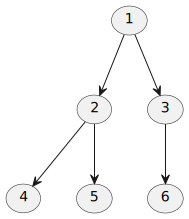

In [4]:
%%plantuml
@startuml
(1) --> (2)
(1) --> (3)
(2) --> (4)
(2) --> (5)
(3) --> (6)
@enduml

In [5]:
def inorder_tree_traversal(root):
    if root:
        inorder_tree_traversal(root.left)
        print(root.data, end=" ")
        inorder_tree_traversal(root.right)
inorder_tree_traversal(root)

4 2 5 1 6 3 

In [6]:
def postorder_tree_traversal(root):
    if root:
        postorder_tree_traversal(root.left)
        postorder_tree_traversal(root.right)
        print(root.data, end=" ")
postorder_tree_traversal(root)

4 5 2 6 3 1 

In [7]:
def preorder_tree_traversal(root):
    if root:
        print(root.data, end=" ")
        preorder_tree_traversal(root.left)
        preorder_tree_traversal(root.right)
preorder_tree_traversal(root)

1 2 4 5 3 6 

In [8]:
def height(root):
    if not root:
        return -1
    ldepth = height(root.left)
    rdepth = height(root.right)
    return max(ldepth, rdepth) + 1
height(root)

2

## Binary Tree from list

In [9]:
def binary_tree(nodes: list) -> BinaryTreeNode:
    if not nodes: return None
    from collections import deque
    queue = deque()
    root = BinaryTreeNode(nodes[0])
    queue.append(root)
    for i in range(len(nodes) // 2):
        node = queue.popleft()
        while not node:
            node = queue.popleft()
            if not queue: return root
        node.left = None if nodes[2*i+1] is None else BinaryTreeNode(nodes[2*i+1])
        node.right = None if nodes[2*i+2] is None else BinaryTreeNode(nodes[2*i+2])
        queue.append(node.left)
        queue.append(node.right)
    return root

## Test If a binary tree is height-balanced

Writing output for /home/shaker/Documents/Github/AlgoRhythms/EPI/ccb3aaaa-ffe8-47be-8cb1-71dd2afb9276.uml to ccb3aaaa-ffe8-47be-8cb1-71dd2afb9276.svg


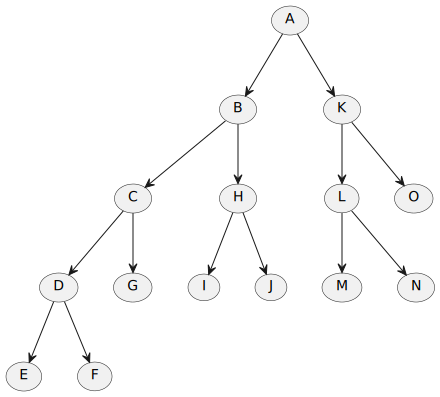

In [10]:
%%plantuml
@startuml
(A) --> (B)
(B) --> (C)
(B) --> (H)
(C) --> (D)
(C) --> (G)
(D) --> (E)
(D) --> (F)
(H) --> (I)
(H) --> (J)
(A) --> (K)
(K) --> (L)
(L) --> (M)
(L) --> (N)
(K) --> (O)
@enduml

In [11]:
def is_height_balanced(root):
    if not root:
        return 1
    l = is_height_balanced(root.left)
    r = is_height_balanced(root.right)
    if not (l and r) or abs(l - r) > 1:
        return False
    else:
        if abs(l - r) < 2:
            return max(l, r) + 1
root = binary_tree(["A", "B", "K", "C", "H", "L", "O", "D", "G", "I", "J", "M", "N", None, None, "E", "F"])
root = binary_tree([3,9,20,None,None,15,7])
root = binary_tree([1,2,2,3,3,None,None,4,4])
bool(is_height_balanced(root))

False

## Book Solution

In [12]:
def is_balanced_tree(root):
    from collections import namedtuple
    BalancedStatusWithHeight = namedtuple('BalancedStatusWithHeight', ('balanced', 'height'))
    def check_balanced(tree):
        if not tree:
            return BalancedStatusWithHeight(True, -1)

        left_result = check_balanced(tree.left)
        if not left_result.balanced:
            return BalancedStatusWithHeight(False, 0)
        
        right_result = check_balanced(tree.right)
        if not right_result.balanced:
            return BalancedStatusWithHeight(False, 0)

        is_balanced = abs(left_result.height - right_result.height) <= 1
        height = max(left_result.height, right_result.height) + 1
        return BalancedStatusWithHeight(is_balanced, height)

    return check_balanced(root).balanced
root = binary_tree([1,2,2,3,3,None,None,4,4])
root = binary_tree([3,9,20,None,None,15,7])
is_balanced_tree(root)

True

## Variants
Q. Write a program that returns the size of the largest subtree that is complete

Q. Define a node in a binary tree to be k-balanced if the difference in the number of nodes in its left and right subtrees is no more than k. Design an algorithm that takes as input a binary tree and positive integer k, and retums a node in the binary tree such that the node is not k-balanced, but all of its descendants are k-balanced. 

# Test if  a binary tree is symmetric

## My Try with Py
In this approach I am checking each level one by one if it is palindromic or not.
I am storing every level in a list and then checking if it is a palimdrome. If this runs all the way then tree is symmetric else not symmetric.

In [13]:
def is_tree_symmetric(root):
    from collections import deque
    queue = deque([root])
    while queue:
        level = []
        while queue:
            node = queue.popleft()
            if node is not None:
                level.extend([node.left, node.right])
        if not all([(level[i].data if level[i] else None) == (level[~i].data if level[~i] else None) for i in range(len(level)//2)]):
            return False
        queue.extend(level)
    return True
root = binary_tree([1,2,2,3,4,4,3])
is_tree_symmetric(root)

True

## Better Approach
We are comparing the left and right of all subtrees and if they are equal then inner function will return true or else false.

In [14]:
def is_tree_symmetric(root):
    def check_symmetric(subtree_0, subtree_1):
        if not subtree_0 and not subtree_1:
            return True
        elif subtree_0 and subtree_1:
            return (
                subtree_0.data == subtree_1.data
                and check_symmetric(subtree_0.left, subtree_1.right)
                and check_symmetric(subtree_0.right, subtree_1.left)
            )
        return False
    return not root or check_symmetric(root.left, root.right)
root = binary_tree([1,2,2,3,4,4,3])
is_tree_symmetric(root)

True

# Compute the lowest common ancestor in a binary tree

## My Try With Py
in this I maintained a object which will be separated from the recursion stack and i manipulate my logic using that `status` object.
I am checking after getting first element in the tree how far it has to go back in order to get the next element using DFS.
Both elements should be in tree for my logic.

In [15]:
preorder_tree_traversal(binary_tree([1,2,3,4,5,6,7,None,None,8,9]))

1 2 4 5 8 9 3 6 7 

In [16]:
def lca(root, p, q):
    #from collections import namedtuple
    #status = namedtuple("status", ("flag", "final", "min_depth", "ca"))
    class status:
        def __init__(self, flag, final, min_depth, ca):
            self.flag = flag
            self.final = final 
            self.min_depth = min_depth
            self.ca = ca
    Status = status(0, None, float("inf"), None)

    def dfs(root, depth=0):
        depth += 1
        if not root: return None
        if root.data == p or root.data == q:
            if not Status.flag:
                Status.min_depth = depth
                Status.flag = 1
            else:
                Status.final = Status.ca

        dfs(root.left, depth)
        if Status.min_depth > depth:
            Status.min_depth = depth
            Status.ca = root
        
        dfs(root.right, depth)
        if Status.min_depth > depth:
            Status.min_depth = depth
            Status.ca = root

    dfs(root)
    return Status.final

root = binary_tree([1,2,3,4,5,6,7,None,None,8,9])
root = binary_tree([3,5,1,6,2,0,8,None,None,7,4])
lca(root,5,1)

BinaryTreeNode(data:3)

## Book Approach
Ok so this is quite interesting. Logic was quite simple.
We have just to find the smallest subtree which are going to have both the elements.

We do that by performing DFS. First we traverse deep into the left subtree then we return ancestor as None in the leaf. From there we get back up the stack and check where we first find the two elements. In whatever subtree we find both elements we return it's root.

Time-complexity: O(h), O(1)

In [ ]:
def lca(tree, node0, node1):
    from collections import namedtuple
    Status = namedtuple("Status", ("num_target_nodes", "ancestor"))
    def lca_helper(tree, node0, node1):
        if not tree:
            return Status(0, None)
        
        left_result = lca_helper(tree.left, node0, node1)
        if left_result.num_target_nodes == 2:
            # Found both in left subtree
            return left_result
        
        right_result = lca_helper(tree.right, node0, node1)
        if right_result.num_target_nodes == 2:
            # Found both in right subtree
            return right_result
        
        num_target_nodes = (
            left_result.num_target_nodes + right_result.num_target_nodes
            + int(tree is node0) + int(tree is node1)
        )
        return Status(num_target_nodes, tree if num_target_nodes == 2 else None)
    return lca_helper(tree, node0, node1).ancestor

# Sum the root to leaf paths in a binary tree

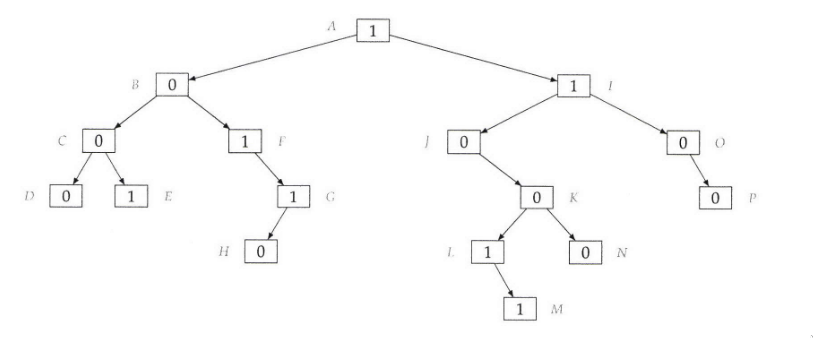

There is a binary tree where each node contains a binary digit. A root to leaf path node can be associated as a binary number(MSB at root, LSB at leaf).

e.g. in above tree we have $(1000)_2, (1001)_2, (10110)_2,$etc.

Design an alogrithm to calculate the sum of binary numbers represented by root to leaf paths.

## My Try With Py

In [48]:
def rl_sum(root):
    res = [0]
    def dfs(root, num=root.data):
        if not (root.left or root.right):
            #res[0] += binary_to_int(num)
            res[0] += num
        if root.left: 
            dfs(root.left, num*2 + root.left.data)
        if root.right:
            dfs(root.right, num*2 + root.right.data)
    dfs(root)
    return res
root = binary_tree([1,0,1,0,1,0,0])
rl_sum(root)

[21]

# Book Approach

In [ ]:
def rl_sum(tree, partial_path_sum=0):
    if not tree:
        return 0
    
    partial_path_sum = pari